<a href="https://colab.research.google.com/github/marigold0225/GWdata_Ligo/blob/main/Tuto_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q 'gwosc==0.5.4'

Reason for being yanked: Metadata is broken


In [ ]:
! pip install -q 'gwpy==1.0.1'

     |████████████████████████████████| 1.4 MB 2.7 MB/s 
     |████████████████████████████████| 51 kB 6.4 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 3.6 MB 36.1 MB/s 


In [ ]:
import gwosc
import gwpy
print(gwosc.__version__)
print(gwpy.__version__)

0.5.4
1.0.1


In [ ]:
from gwosc.datasets import find_datasets
from gwosc import datasets

#-- List all available catalogs
print("List of available catalogs")
print(find_datasets(type="catalog"))
print("")

#-- Print all the GW events from the GWTC-1 catalog
gwtc1 = datasets.find_datasets(type='events', catalog='GWTC-1-confident')
print('GWTC-1 events:', gwtc1)
print("")

List of available catalogs
['GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'GWTC-2.1-auxiliary', 'GWTC-2.1-confident', 'GWTC-2.1-marginal', 'GWTC-3-confident', 'GWTC-3-marginal', 'Initial_LIGO_Virgo', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal']

GWTC-1 events: ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']



In [ ]:
runs = find_datasets(type='run')
print('Large data sets:', runs)

Large data sets: ['BKGW170608_16KHZ_R1', 'O1', 'O1_16KHZ', 'O2_16KHZ_R1', 'O2_4KHZ_R1', 'O3a_16KHZ_R1', 'O3a_4KHZ_R1', 'O3b_16KHZ_R1', 'O3b_4KHZ_R1', 'S5', 'S6']


In [ ]:
#-- Detector and segments keywords limit search result
print(datasets.find_datasets(type='events', catalog='GWTC-1-confident', detector="L1", segment=(1164556817, 1187733618)))

['GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


In [ ]:
from gwosc.datasets import event_gps
gps = event_gps('GW170817')
print(gps)

1187008882.4


In [ ]:
segment = (int(gps)-5,int(gps)+5)
print(segment)

(1187008877, 1187008887)


In [ ]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('L1',*segment,verbose=True)
print(hdata)

Fetched 1 URLs from www.gw-openscience.org for [1187008877 .. 1187008887))
Reading data... [Done]
TimeSeries([1.28236790e-19, 1.19758281e-19, 1.25450032e-19, ...,
            6.43515284e-20, 6.80497504e-20, 6.83906719e-20]
           unit: dimensionless,
           t0: 1187008877.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


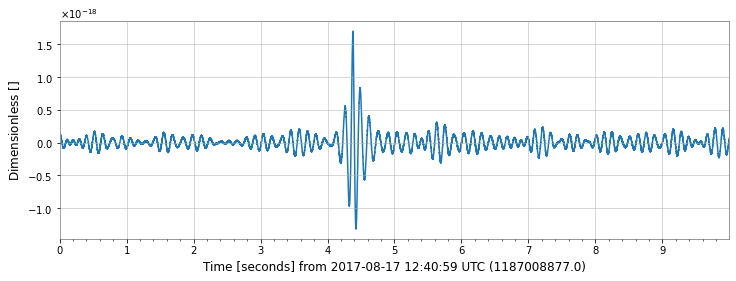

In [ ]:
%matplotlib inline
plot = hdata.plot()

In [ ]:
fft = hdata.fft()
print(fft)

FrequencySeries([-1.73578437e-22+0.00000000e+00j,
                 -3.50314468e-22+1.12549788e-23j,
                 -3.67114959e-22+5.54275241e-23j, ...,
                  1.70587778e-24+6.36053412e-26j,
                  1.65990114e-24+4.75594623e-26j,
                  1.71450418e-24+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1187008877.0,
                name: Strain,
                channel: None)


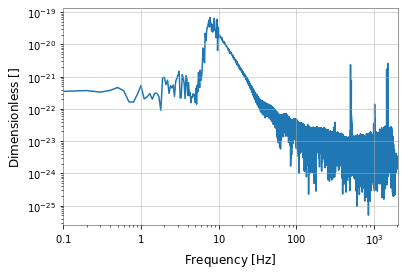

In [ ]:
plot = fft.abs().plot(xscale="log",yscale="log")
plot.show(warn=False)  

In [ ]:
from scipy.signal import get_window
window = get_window('hann',hdata.size)
hwin = hdata * window

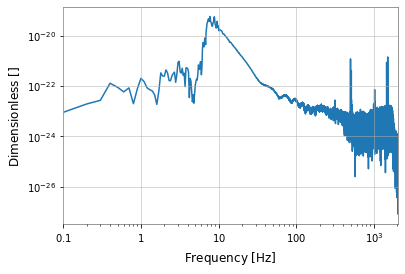

In [ ]:
fftamp = hwin.fft().abs()
plot = fftamp.plot(xscale="log",yscale="log")
plot.show(warn=False)

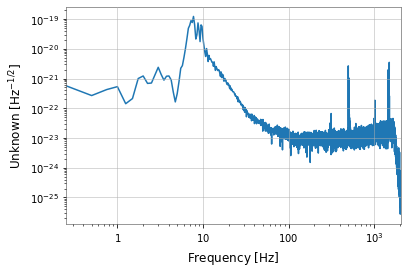

In [ ]:
asd = hdata.asd(fftlength=4,method="median")
plot = asd.plot()
plot.show(warn=False)

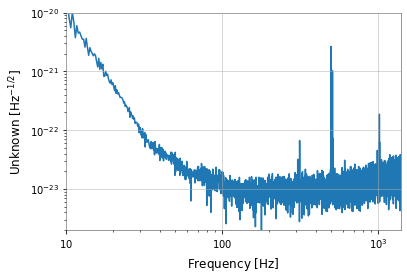

In [ ]:
ax = plot.gca()
ax.set_xlim(10,1400)
ax.set_ylim(2e-24,1e-20)
plot

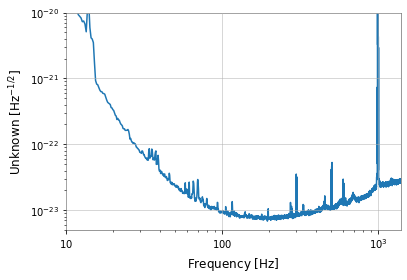

In [ ]:
hdata2 = TimeSeries.fetch_open_data('H1',int(gps)-512,int(gps)+512,cache=True)
hasd2 = hdata2.asd(fftlength=4,method='median')
plot = hasd2.plot()
ax = plot.gca()
ax.set_xlim(10,1400)
ax.set_ylim(5e-24,1e-20)
plot.show(warn=False)

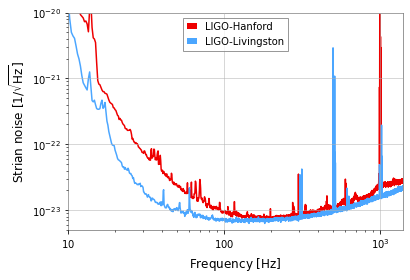

In [ ]:
ldata2 = TimeSeries.fetch_open_data('L1',int(gps)-512,int(gps)+512,cache=True)
lasd2 = ldata2.asd(fftlength=4,method="median")
ax.plot(lasd2, label='LIGO-Livingston',color='gwpy:ligo-livingston')
hline = ax.lines[0]
hline.set_color('gwpy:ligo-hanford')
hline.set_label('LIGO-Hanford')
ax.set_ylabel(r'Strian noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot

In [ ]:
from gwosc.datasets import run_segment
print(run_segment('O1'))

(1126051217, 1137254417)


In [ ]:
O1_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O1'))
print(O1_events)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2']


In [ ]:
from gwosc.locate import get_event_urls
urls = get_event_urls('GW150914')
print(urls)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


In [ ]:
urls = get_event_urls('GW170814', duration=32, detector='L1')
print(urls)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170814/v3/L-L1_GWOSC_4KHZ_R1-1186741846-32.hdf5']


In [ ]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('L1',*segment,verbose=True)
print(hdata)

Fetched 1 URLs from www.gw-openscience.org for [1187008877 .. 1187008887))
Reading data... [Done]
TimeSeries([1.28236790e-19, 1.19758281e-19, 1.25450032e-19, ...,
            6.43515284e-20, 6.80497504e-20, 6.83906719e-20]
           unit: dimensionless,
           t0: 1187008877.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


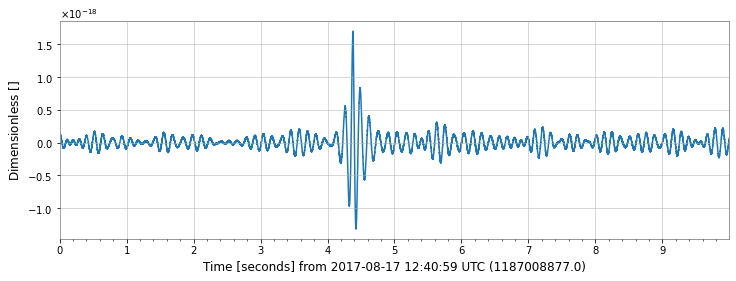

In [ ]:
plot = hdata.plot()

# 新段落